# Data Science TP2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

## Exercice 1

In [2]:
### Question 1 ###

df = pd.read_csv('diabetes.csv')
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
### Question 2 ###

X = df.drop(['Outcome'],axis=1) #Variables explicatives
Y = df['Outcome'] #Variables à expliquer


'''
1. Entraînement du modèle, il apprend à partir de X_train et Y_train.
2. On évalue la performance du modèle en comparant ses prédictions sur X_test avec les vraies valeurs de Y_test.
'''


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Exercice 1 - Prise en compte de 2 variables

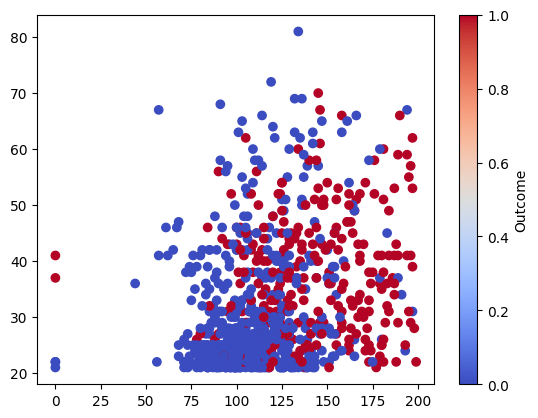

In [4]:
### Question 3 ###

plt.colorbar(plt.scatter(X['Glucose'], X['Age'], c=Y, cmap='coolwarm'), label='Outcome')

In [5]:
### Question 4 ###

#Analyse gaussienne homoscédastique
clf_linear = LinearDiscriminantAnalysis()
clf_linear.fit(X_train[['Glucose','Age']], Y_train)


#Analyse gaussienne hétéroscédastique
clf_quadratic = QuadraticDiscriminantAnalysis()
clf_quadratic.fit(X_train[['Glucose','Age']], Y_train)


print('linéaire = ', clf_linear.predict(X_test[['Glucose','Age']]), '\n','quadratique = ', clf_quadratic.predict(X_test[['Glucose','Age']]))

linéaire =  [0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1
 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0] 
 quadratique =  [0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1
 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


c:\Users\hippo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
c:\Users\hippo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


'\nDans la zobe bleu => les points sont diabétiques\nDans la zone rouge => pas diabétiques\n'

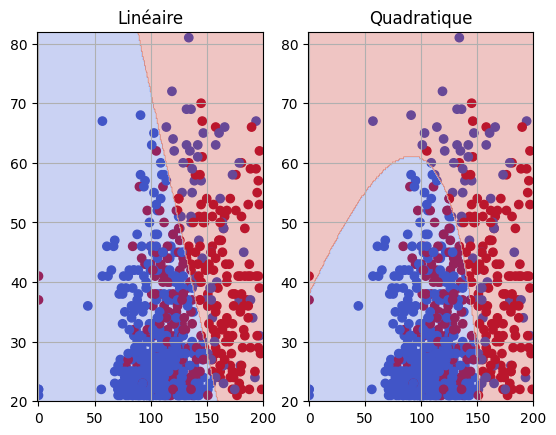

In [6]:
### Question 5 ###

#Limite du graphique
x_min, x_max = X['Glucose'].min() - 1, X['Glucose'].max() + 1
y_min, y_max = X['Age'].min() - 1, X['Age'].max() + 1

#Création d'une grille de deux axes avec 200 points entre borne min et max
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

#Prédictions des deux modèles
Z = clf_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z_qda = clf_quadratic.predict(np.c_[xx.ravel(), yy.ravel()])

#Adapte les prédictions par rapport à la grille créée
Z = Z.reshape(xx.shape)
Z_qda = Z_qda.reshape(xx.shape)


# Affichage
plt.subplot(1, 2, 1)
plt.scatter(X['Glucose'], X['Age'], c=Y, cmap='coolwarm')
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.grid(True)
plt.title('Linéaire')

plt.subplot(1, 2, 2)
plt.scatter(X['Glucose'], X['Age'], c=Y, cmap='coolwarm')
plt.contourf(xx, yy, Z_qda, alpha=0.3, cmap='coolwarm')
plt.grid(True)
plt.title('Quadratique')


'''
Dans la zobe bleu => les points sont diabétiques
Dans la zone rouge => pas diabétiques
'''

In [7]:
### Question 6 ###

#Matrice de confusion
print(confusion_matrix(Y_test,clf_linear.predict(X_test[['Glucose','Age']])))
print(confusion_matrix(Y_test,clf_quadratic.predict(X_test[['Glucose','Age']])))

#Accuracy des tests
print(accuracy_score(Y_test,clf_linear.predict(X_test[['Glucose','Age']])))
print(accuracy_score(Y_test,clf_quadratic.predict(X_test[['Glucose','Age']])))

[[86 13]
 [25 30]]
[[83 16]
 [26 29]]
0.7532467532467533
0.7272727272727273


### Exercice 1 - Prise en compte des variables 2 à 2

In [8]:
# On commence par nettoyer les données :
df_bis = df.drop(['Outcome'],axis=1)
df_bis.replace(0,df.mean(axis=0),inplace=True)
df_bis['Outcome'] = df['Outcome']

# On recalcul les bases
X = df_bis.drop(['Outcome'],axis=1) #Variables explicatives
Y = df_bis['Outcome'] #Variables à expliquer
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

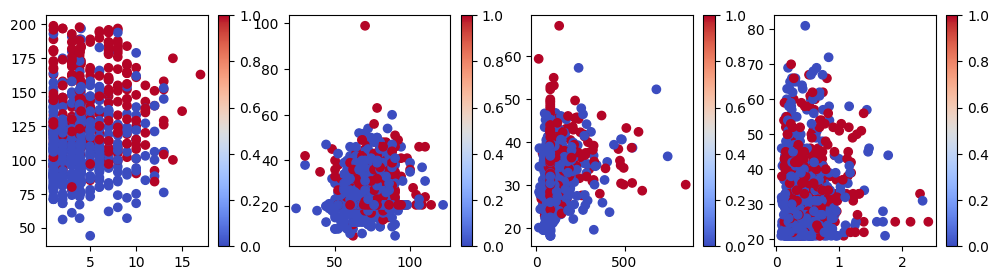

In [9]:
### Question 3 ###

def nuage_de_points(X,Y):
    fig, axes = plt.subplots(1,4,figsize=(12,3))
    for j in range(0, X.shape[1], 2):
        fig.colorbar(axes[j // 2].scatter(X.iloc[:, j], X.iloc[:, j + 1], c=Y, cmap='coolwarm'), ax = axes[j // 2])

nuage_de_points(X,Y)

In [10]:
### Question 4 ###

#Analyse gaussienne homoscédastique
clf_linear.fit(X_train, Y_train)


#Analyse gaussienne hétéroscédastique
clf_quadratic.fit(X_train, Y_train)


print('linéaire = ', clf_linear.predict(X_test), '\n','quadratique = ', clf_quadratic.predict(X_test))

linéaire =  [0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0] 
 quadratique =  [0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 0]


c:\Users\hippo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
c:\Users\hippo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
c:\Users\hippo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
c:\Users\hippo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
c:\Users\hippo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

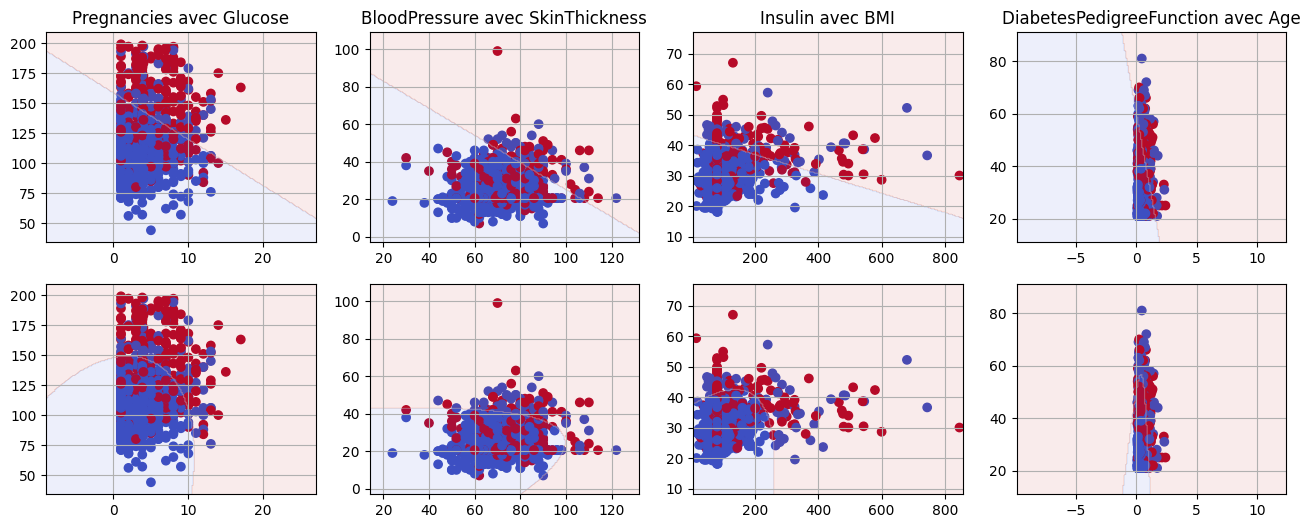

In [11]:
### Question 5 ###

def frontiere(X, Y):
    fig, axes = plt.subplots(2, 4, figsize=(16, 6))
    for j in range(0, X.shape[1], 2):
        columns = X.columns[j:j + 2]

        clf_linear.fit(X[columns], Y)
        clf_quadratic.fit(X[columns], Y)

        x_min, x_max = X[columns[0]].min() - 10, X[columns[0]].max() + 10
        y_min, y_max = X[columns[1]].min() - 10, X[columns[1]].max() + 10

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
        Z_lin = clf_linear.predict(np.c_[xx.ravel(), yy.ravel()])
        Z_qda = clf_quadratic.predict(np.c_[xx.ravel(), yy.ravel()])

        Z_lin = Z_lin.reshape(xx.shape)
        Z_qda = Z_qda.reshape(xx.shape)

        # Tracer la frontière linéaire
        axes[0, j // 2].scatter(X[columns[0]], X[columns[1]], c=Y, cmap='coolwarm')
        axes[0, j // 2].contourf(xx, yy, Z_lin, alpha=0.1, cmap='coolwarm')
        axes[0, j // 2].grid(True)
        axes[0, j // 2].set_title(f'{columns[0]} avec {columns[1]}')

        # Tracer la frontière quadratique
        axes[1, j // 2].scatter(X[columns[0]], X[columns[1]], c=Y, cmap='coolwarm')
        axes[1, j // 2].contourf(xx, yy, Z_qda, alpha=0.1, cmap='coolwarm')
        axes[1, j // 2].grid(True)


frontiere(X, Y)

## Exercice 2

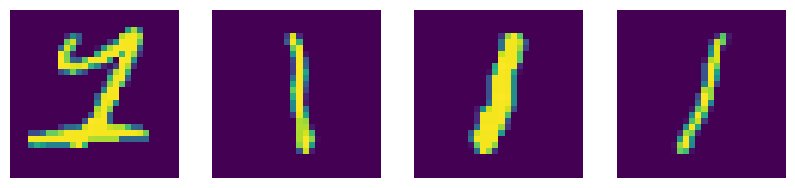

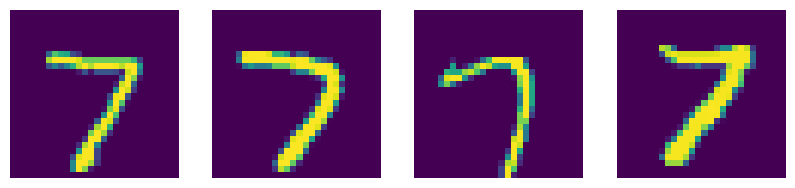

In [12]:
### Question 1 ###


#Importation des données
X, Xt, Y, Yt = pd.read_csv('digitsX.csv', sep=','), pd.read_csv('digitsXt.csv'), pd.read_csv('digitsY.csv',), pd.read_csv('digitsYt.csv')
X.drop(columns=['Unnamed: 0'],inplace=True)
Xt.drop(columns=['Unnamed: 0'],inplace=True)
Y.drop(columns=['Unnamed: 0'],inplace=True)
Yt.drop(columns=['Unnamed: 0'],inplace=True)


X = X.to_numpy()
Y = Y.to_numpy()
Xt = Xt.to_numpy()
Yt= Yt.to_numpy()


#Affichage de quelques données
def afficher_images(X, indices, n_lignes, n_colonnes):
    n_images = len(indices)
    
    if n_images > n_lignes * n_colonnes:
        print("Le nombre d'images dépasse le nombre d'axes disponibles.")
        return
    
    else :
        fig, axes = plt.subplots(n_lignes, n_colonnes, figsize=(10, 5))
        axes = axes.flatten()
        for i, k in enumerate(indices):
            if i < n_images:
                ax = axes[i]
                ax.matshow(X[k].reshape((28, 28)))
                ax.axis('off')
                

afficher_images(X, range(500,504), 1, 4)
afficher_images(Xt, range(500,504), 1, 4)


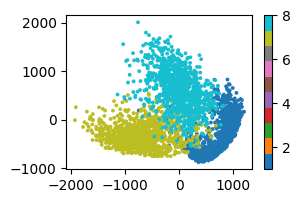

In [13]:
#On applique le PCA
pca = PCA()
pca.fit(X)
F = pca.transform(X)


plt.figure(figsize=(3, 2))
plt.scatter(F[:,0], F[:,1], c=Y, cmap=plt.get_cmap("tab10"), s=3)
plt.colorbar()

In [19]:
### Question 2 ###

lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()


#Entrainement des modèles
lda.fit(X, Y.ravel())
qda.fit(X, Y.ravel())


#Test des modèles
Y_pred_lda = lda.predict(Xt)
Y_pred_qda = qda.predict(Xt)


#Modèle Linéaire
print('Accuracy linéaire :', lda.score(Xt, Yt))
pd.DataFrame(confusion_matrix(Yt, Y_pred_lda), index =['V1', 'V7', 'V8'], columns = ['P1', 'P7', 'P8'])

c:\Users\hippo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy linéaire : 0.9333333333333333


,P1,P7,P8
V1,488,2,10
V7,32,457,11
V8,33,12,455


In [17]:
#Modèle Quadratique
print('Accuracy quadratique :', qda.score(Xt, Yt))
pd.DataFrame(confusion_matrix(Yt, Y_pred_qda), index =['V1', 'V7', 'V8'], columns = ['P1', 'P7', 'P8'])

Accuracy quadratique : 0.9213333333333333


,P1,P7,P8
V1,465,0,35
V7,2,449,49
V8,15,17,468
